In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import imageio

## Draw a histogram


In [2]:
lifeexp = pd.read_excel('resources/gapminder_lifeexpectancy.xlsx', engine='openpyxl')

In [3]:
lifeexp.head()

,Life expectancy,1800.0,1801.0,1802.0,1803.0,1804.0,1805.0,1806.0,1807.0,1808.0,...,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,28.21,28.20,28.19,28.18,28.17,28.16,28.15,28.14,28.13,...,52.4,52.8,53.3,53.6,54.0,54.4,54.8,54.9,53.8,52.72
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,...,76.6,76.8,77.0,77.2,77.4,77.5,77.7,77.9,78.0,78.10
4,Algeria,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,...,75.3,75.5,75.7,76.0,76.1,76.2,76.3,76.3,76.4,76.50


In [4]:
lifeexp_reduced = lifeexp[[1950, 1975, 2000, 2015]]

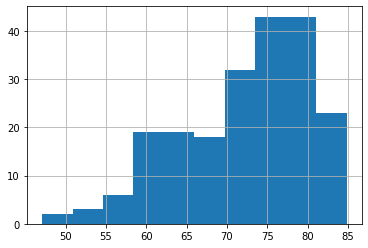

In [5]:
lifeexp_reduced[2015].hist()
plt.savefig('histo.png')

<AxesSubplot:>

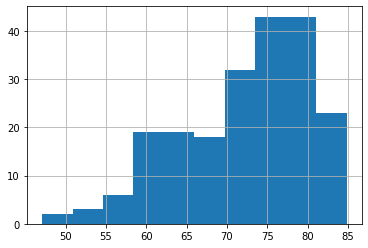

In [6]:
lifeexp_reduced[2015].hist()

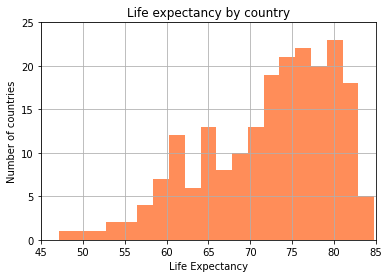

In [7]:
lifeexp_reduced[2015].hist(bins=20, facecolor='#ff5000',alpha=0.65,
histtype='bar',)
plt.title('Life expectancy by country')
plt.xlabel('Life Expectancy')
plt.ylabel('Number of countries')
plt.axis([45, 85, 0, 25])
plt.savefig('histo.svg', dpi=150)

## Draw a bar plot


In [8]:
fert = pd.read_csv('resources/gapminder_total_fertility.csv', index_col=0)
fert.head()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Total fertility rate,,,,,,,,,,,,,,,,,,,,,
Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,...,6.70,6.46,6.20,5.93,5.66,5.40,5.14,4.90,4.68,4.47
Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albania,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,...,1.85,1.80,1.76,1.74,1.74,1.75,1.76,1.77,1.78,1.78
Algeria,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,...,2.58,2.66,2.73,2.78,2.82,2.83,2.82,2.80,2.76,2.71


In [9]:
fert_reduced = fert[['1950', '1955', '2000']]


In [10]:
fert_reduced = fert_reduced.loc[['Germany', 'India', 'Bulgaria', 'Kenya']]

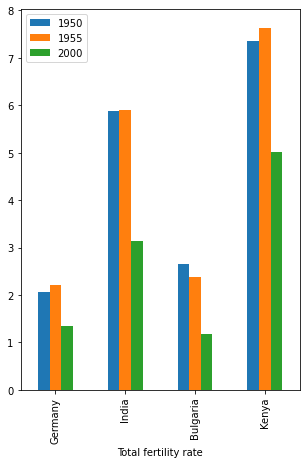

In [11]:
from matplotlib import pyplot as plt
fert_reduced.plot.bar(figsize=(5,7))
plt.savefig('bars.png')


<AxesSubplot:xlabel='Total fertility rate'>

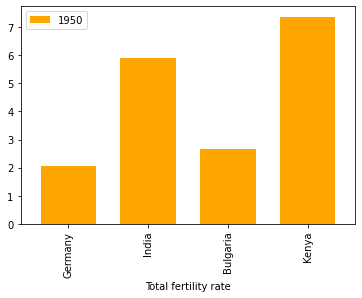

In [12]:
fert_reduced.plot.bar(y='1950', width=0.7, color='orange')


## Animated scatterplot

### Load and format data

#### Population data

In [13]:
pop = pd.read_excel('resources/gapminder_population.xlsx', engine='openpyxl')
pop.rename(columns = {'Total population':'country'}, inplace=True)
pop = pop.melt(id_vars='country', var_name='year', value_name='population')

pop.head()

,country,year,population
0,Abkhazia,1800.0,NaN
1,Afghanistan,1800.0,3280000.0
2,Akrotiri and Dhekelia,1800.0,NaN
3,Albania,1800.0,410445.0
4,Algeria,1800.0,2503218.0


#### Life expectancy data

In [14]:
lifeexp = pd.read_excel('resources/gapminder_lifeexpectancy.xlsx', engine='openpyxl')
lifeexp.columns

Index(['Life expectancy',            1800.0,            1801.0,
                  1802.0,            1803.0,            1804.0,
                  1805.0,            1806.0,            1807.0,
                  1808.0,
       ...
                  2007.0,            2008.0,            2009.0,
                  2010.0,            2011.0,            2012.0,
                  2013.0,            2014.0,            2015.0,
                  2016.0],
      dtype='object', length=218)

In [15]:
lifeexp.set_index('Life expectancy', inplace=True)
lifeexp.index.name = 'country'
lifeexp.reset_index(inplace=True)
lifeexp = lifeexp.melt(id_vars='country', var_name='year', value_name='life_expectancy')
lifeexp.head()

,country,year,life_expectancy
0,Abkhazia,1800.0,NaN
1,Afghanistan,1800.0,28.21
2,Akrotiri and Dhekelia,1800.0,NaN
3,Albania,1800.0,35.40
4,Algeria,1800.0,28.82


#### Fertility data

In [16]:
fert.columns = fert.columns.astype(int)
fert.index.name = 'country'
fert = fert.reset_index()
fert = fert.melt(id_vars='country', var_name='year', value_name='fertility_rate')
fert.head()

,country,year,fertility_rate
0,Abkhazia,1800,NaN
1,Afghanistan,1800,7.00
2,Akrotiri and Dhekelia,1800,NaN
3,Albania,1800,4.60
4,Algeria,1800,6.99


In [17]:
fert_1800 = fert[fert['year'] == 1800]
fert_1800

,country,year,fertility_rate
0,Abkhazia,1800,NaN
1,Afghanistan,1800,7.00
2,Akrotiri and Dhekelia,1800,NaN
3,Albania,1800,4.60
4,Algeria,1800,6.99
...,...,...,...
255,Yugoslavia,1800,NaN
256,Zambia,1800,6.71
257,Zimbabwe,1800,6.75
258,Åland,1800,NaN


#### continents

In [18]:
cont = pd.read_csv('resources/continents.csv', sep=';')
cont

,continent,country
0,Africa,Algeria
1,Africa,Angola
2,Africa,Benin
3,Africa,Botswana
4,Africa,Burkina
...,...,...
189,South America,Paraguay
190,South America,Peru
191,South America,Suriname
192,South America,Uruguay


### Merge into a dataframe

In [19]:
df = fert.merge(pop, how='outer')
df_all = df.merge(lifeexp, how='outer')
df_all.head(20)

/Users/em/opt/anaconda3/lib/python3.9/site-packages/pandas/core/reshape/merge.py:916: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  key_col = Index(lvals).where(~mask_left, rvals)
/Users/em/opt/anaconda3/lib/python3.9/site-packages/pandas/core/reshape/merge.py:916: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  key_col = Index(lvals).where(~mask_left, rvals)


,country,year,fertility_rate,population,life_expectancy
0,Abkhazia,1800.0,NaN,NaN,NaN
1,Afghanistan,1800.0,7.00,3280000.0,28.21
2,Akrotiri and Dhekelia,1800.0,NaN,NaN,NaN
3,Albania,1800.0,4.60,410445.0,35.40
4,Algeria,1800.0,6.99,2503218.0,28.82
5,American Samoa,1800.0,NaN,8170.0,NaN
6,Andorra,1800.0,NaN,2654.0,NaN
7,Angola,1800.0,6.93,1567028.0,26.98
8,Anguilla,1800.0,NaN,2025.0,NaN
9,Antigua and Barbuda,1800.0,5.00,37000.0,33.54


In [20]:
df_all = df_all.merge(cont, on='country')

### Create scatterplot of year 2000

<AxesSubplot:xlabel='life_expectancy', ylabel='fertility_rate'>

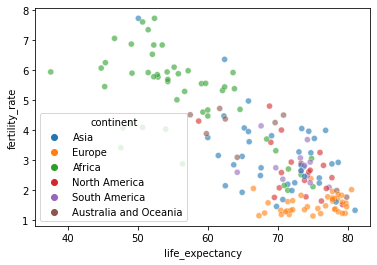

In [21]:
df_subset = df_all[df_all['year'] == 2000]
sns.scatterplot(x='life_expectancy', y='fertility_rate',
            data=df_subset, alpha=0.6, hue='continent')

### Create gif

To create an animated scatterplot showing the correlation between life expectancy and fertility, create one plot for each year between 1960 and 2015 (before that, the data contains too many gaps).

Write a for loop that goes through each year and produces a scatterplot.

Save each scatterplot to a separate file containing the year in the filename, e.g. lifeexp_1999.png. After saving the plot call plt.close() to remove the plot from the notebook.

Hint Use the function plt.axis((xmin, xmax, ymin, ymax)) to fix the coordinates of the plot.

In [22]:
save_path = '/Users/em/Documents/Spiced/repos/random-rose-student-code/week_1/Project_1/figures/'


In [23]:
years_list = []

for year in df_all['year'][df_all['year'] >= 1960].unique():
    years_list.append(int(year))
    
years_list = years_list[:-1]
print(years_list)

[1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]


In [24]:
import numpy as np 

dict = {}

for population in df_all['population']:
    if np.isnan(population) == False:
        dict[population] = population / 100000
        print(dict[population])
    
#print(dict)

32.8
32.8
33.23519
34.48982
36.25022
38.10047
39.73968
41.6969
44.19695
47.10171
50.21241
53.51413
58.13814
63.94908
70.34081
77.52118
78.39426
79.34798
80.38312
81.50037
82.70024
83.98309
85.34913
86.79848
88.33127
89.94793
91.64945
93.43772
95.31555
97.28645
99.35358
101.48841
103.686
105.9979
108.4951
111.21097
114.12821
117.16896
120.22514
123.15553
125.82954
128.31361
130.56499
132.22547
132.83279
132.11412
129.96923
126.67001
122.79095
119.1251
116.30498
114.38949
113.37932
113.75768
116.08351
120.6757
127.89374
137.4563
148.24371
158.69967
167.72522
174.818
180.3413
185.1148
190.3842
197.0194
205.3116
214.87079
225.07368
234.9985
243.99948
251.83615
258.77544
265.28741
272.07291
279.62207
288.09167
297.26803
306.825
316.27506
325.26562
4.10445
4.23591
4.38671
4.57234
4.78227
5.06889
5.528
6.10036
6.72544
7.41688
8.1995
9.01122
9.63956
10.15991
11.2321
12.63171
12.87499
13.16086
13.48097
13.82881
14.19969
14.59089
15.00152
15.43224
15.88478
16.36054
16.85901
17.37645
17.90533
18.

2.82215
4.12533
4.2527
4.37182
4.48437
4.59206
4.69671
4.80016
4.90433
5.01117
5.12256
5.24029
5.36576
5.4999
5.64316
5.7956
5.95741
6.1295
6.31276
6.5073
6.71305
6.93021
7.15811
7.39754
7.65177
7.92513
8.22029
8.5386
8.87793
9.23305
9.59666
9.96331
10.33073
10.69962
11.07103
11.44716
11.82942
12.21668
12.6072
13.00097
13.39813
13.79814
14.20098
14.60453
15.00356
15.39135
15.76291
16.11827
16.45846
16.78111
17.08368
17.36579
17.62531
17.86672
18.10438
18.3575
18.64003
18.95671
19.30431
19.67866
20.07212
20.47831
20.89706
21.32822
21.7651
22.19937
22.62485
36.39636
40.58652
45.82325
53.01068
62.06694
72.54194
84.66005
99.64419
118.93392
144.10738
181.03489
224.14074
276.60862
338.88997
415.45129
539.74726
556.05541
573.04772
590.53267
608.38782
626.55984
645.06874
664.00362
683.51012
703.76952
724.93585
747.06888
770.07549
793.68453
817.51802
841.30061
864.94987
888.53679
912.13009
935.85746
959.82453
984.022
1008.44391
1033.20787
1058.46274
1084.31284
1110.76063
1137.76467
1165.32153
1

24.82542
28.85962
34.32631
41.0903
50.1992
63.94596
81.44252
94.42173
123.40899
126.99949
130.64689
134.38645
138.24721
142.25197
146.41718
150.75304
155.26391
159.94891
164.80384
169.82313
175.00166
180.33548
185.81972
191.4422
197.21464
203.11369
209.05061
214.90948
220.61214
226.11988
231.46803
236.74505
242.08022
247.56969
253.23412
259.05124
265.02172
271.1351
277.37905
283.75995
290.27158
296.87096
303.50082
310.11686
316.6978
323.24326
329.75533
336.24442
342.71563
349.1677
355.58683
361.9517
368.23539
374.4198
380.4904
386.45409
392.34059
398.19279
404.03959
409.88909
415.72493
421.52147
427.24157
432.85636
438.35744
443.74647
449.0166
454.16276
459.18101
464.06446
468.81018
473.42363
477.91393
482.28704
0.56346
0.56346
0.57537
0.61016
0.65999
0.71389
0.77147
0.8337
0.90059
0.97281
1.05128
1.13579
1.22773
1.32799
1.43644
1.56334
1.60083
1.63553
1.66839
1.70019
1.73149
1.76265
1.79386
1.82512
1.85629
1.88732
1.91828
1.9496
1.98205
2.01665
2.05412
2.09536
2.14038
2.18794
2.23629


31.64095
32.02598
32.60612
33.37227
34.29656
35.35156
36.55006
37.88532
39.28408
40.64958
41.91273
43.0444
44.06299
45.00638
45.93549
46.89664
47.89568
48.92233
49.98824
51.10444
52.27791
3.34136
3.34136
3.42427
3.66799
4.02035
4.40656
4.82924
5.29246
5.79703
6.34935
6.95838
7.62326
8.35438
9.15693
10.03658
11.00998
11.13247
11.25245
11.36906
11.48217
11.59238
11.70105
11.81025
11.92265
12.04117
12.16831
12.30521
12.45098
12.60239
12.75471
12.90437
13.05025
13.19284
13.33213
13.46854
13.60236
13.73336
13.86099
13.98497
14.10492
14.2207
14.33207
14.43926
14.54309
14.64468
14.74487
14.83938
14.92704
15.0149
15.11272
15.22477
15.36112
15.51288
15.64278
15.70051
15.6532
15.48287
15.20879
14.8812
14.57145
14.33076
14.17786
14.09718
14.06388
14.03821
13.99145
13.91754
13.82735
13.7289
13.63549
13.55662
13.49369
13.44233
13.39941
13.36013
13.32089
13.28068
13.2404
13.2005
13.16203
13.12558
29.4899
29.4899
30.63453
34.07854
39.23805
45.17871
51.87597
59.56559
68.30859
78.32385
89.93179
103.177

6.43962
6.52566
6.62597
6.73893
6.86155
6.98917
7.11828
7.24863
7.38117
7.51512
7.64974
7.78482
7.91959
8.05481
8.19371
8.34068
8.49886
8.66947
8.85166
9.04391
9.24378
9.44941
9.66039
9.87718
10.09967
10.32797
10.56208
10.80191
11.04708
11.29706
11.55111
11.80877
12.07006
12.3352
12.60424
12.87727
13.15455
13.43646
13.72367
14.01716
14.31816
14.62784
14.94603
15.27342
15.61293
15.96832
16.34196
16.73509
17.1462
17.57138
18.00513
18.44325
1.66034
1.66034
1.69103
1.7803
1.90726
2.04328
2.18524
2.33706
2.49866
2.67135
2.85691
3.05477
3.26874
3.50185
3.75159
4.06562
4.2029
4.3585
4.5226
4.68805
4.85041
5.00809
5.16218
5.31605
5.47461
5.64222
5.82034
6.00559
6.18887
6.35778
6.50379
6.62332
6.71986
6.80068
6.87658
6.95561
7.03811
7.12188
7.20919
7.30227
7.40167
7.51008
7.62445
7.73227
7.81677
7.86614
7.87728
7.85466
7.80367
7.73302
7.65043
7.55598
7.45149
7.34872
7.26237
7.20282
7.17502
7.17621
7.1991
7.2323
7.26695
7.30193
7.33854
7.37316
7.40189
7.42218
7.43163
7.43107
7.42537
7.42162
7.42

0.94257
0.9631
0.98437
1.00566
1.02648
1.04662
1.0662
1.08544
1.1047
1.12423
0.8128
0.8128
0.8128
0.8128
0.8128
0.8128
0.81014
0.81947
0.85115
0.89663
0.94474
0.9953
1.08683
1.20719
1.34088
1.5225
1.63632
1.73622
1.81957
1.88811
1.94795
2.00988
2.08907
2.20405
2.37516
2.61962
2.94639
3.35161
3.81665
4.31366
4.82173
5.33521
5.85831
6.3917
6.93876
7.50184
8.079
8.66747
9.26817
9.88267
10.51187
11.15463
11.80939
12.47597
13.15428
13.84342
14.52383
15.18855
15.86205
16.5792
17.3532
18.23201
19.1795
20.02645
20.54443
20.58832
20.0711
19.09096
17.91511
16.91891
16.37031
16.37906
16.86256
17.66247
18.53152
19.2947
19.90022
20.42215
20.95993
21.66344
22.63604
23.89498
25.38591
27.0529
28.81243
30.59473
32.39181
34.19581
35.93689
37.53121
38.92115
5.90588
5.90588
6.05262
6.484
7.10771
7.79141
8.5435
9.36818
10.26699
11.25139
12.33746
13.52379
14.82686
16.25309
17.81651
19.49
19.54829
19.65114
19.79028
19.95859
20.15009
20.35996
20.58457
20.82127
21.06821
21.32368
21.58546
21.85016
22.11297
22.3

1.74027
1.85742
1.98192
2.11471
2.25706
2.40859
2.5705
2.74305
2.92719
3.11997
3.12725
3.13192
3.13505
3.13735
3.13914
3.14037
3.14063
3.1392
3.1352
3.12788
3.11702
3.10325
3.08815
3.07389
3.06212
3.05357
3.04805
3.04514
3.04401
3.04414
3.04546
3.0485
3.05398
3.06291
3.07597
3.09328
3.11455
3.13953
3.16781
3.19898
3.23298
3.26953
3.30761
3.34592
3.38348
3.41978
3.4549
3.48912
3.52304
3.55707
3.59113
3.62492
3.65838
3.69142
3.72391
3.7561
3.78789
3.81844
3.84663
3.8718
3.89323
3.91148
3.9287
3.94786
3.97094
3.99892
4.03076
4.06392
4.09475
4.12064
4.14075
4.15596
4.16747
4.17723
4.1867
0.05828
0.05828
0.05924
0.06203
0.06598
0.07018
0.07461
0.07932
0.0843
0.0896
0.09525
0.10124
0.10765
0.1145
0.12179
0.13
0.13221
0.13436
0.13626
0.1378
0.13899
0.13994
0.14087
0.14206
0.14389
0.14665
0.15052
0.15545
0.16111
0.16702
0.17283
0.1784
0.18388
0.18965
0.19622
0.20397
0.2131
0.2234
0.2344
0.24536
0.2558
0.26549
0.2747
0.28399
0.29416
0.30581
0.31895
0.33334
0.34895
0.36567
0.38334
0.40203
0.4214

45.20727
46.12229
47.00777
47.86641
48.69627
49.49661
50.26792
51.0075
51.71736
52.40876
53.09703
53.79327
54.50217
55.22119
55.94524
56.66595
57.37722
58.07787
58.77034
59.45646
60.13913
60.82032
12.44861
12.44861
12.6228
13.12557
13.83237
14.57723
15.43423
16.34127
17.29822
18.31048
19.3853
20.52052
21.69089
22.85892
24.08985
25.59703
26.37582
27.17047
27.97435
28.78395
29.59896
30.42231
31.2601
32.12101
33.01531
33.95212
34.93636
35.96613
37.03159
38.11813
39.21581
40.3221
41.44238
42.58415
43.75837
44.97355
46.23121
47.53054
48.87484
50.26744
51.71029
53.20869
54.76206
56.35954
57.98584
59.63159
61.29762
62.99343
64.72971
66.5211
68.3817
70.31675
72.33482
74.45788
76.71233
79.11884
81.68834
84.4233
87.325
90.39088
93.61912
97.0173
100.5896
104.32657
108.21434
112.24523
116.42308
120.75991
125.26725
129.96012
134.85436
139.9553
145.27631
150.8513
156.72194
162.9199
169.46485
176.35782
183.58863
191.13728
198.9912
121.00855
121.00855
122.38319
126.3333
131.84823
137.6039
143.74142
15

0.58238
0.58782
0.59744
0.6099
0.62316
0.63476
0.64255
0.64549
0.64429
0.64181
0.64209
0.64797
0.66057
0.67874
0.7004
0.7224
0.74251
0.75989
0.77536
0.79026
0.8067
0.82607
0.84889
0.87436
0.90095
0.92652
0.94953
0.96947
0.98692
1.00285
1.01871
1.03557
1.05364
1.07264
1.09268
1.11373
1.13575
1.159
1.18346
1.20849
1.23318
1.25694
1.27946
1.3011
1.32284
1.34602
1.37164
1.40003
1.43085
1.46357
1.49732
1.53146
1.56584
1.60064
1.63595
1.67196
1.7088
1.74646
1.78484
1.82386
1.86342
1.90344
20.91
20.91
21.03325
21.38414
21.86704
22.36084
22.84384
23.39375
24.05921
24.80109
25.56758
26.35671
27.37469
28.53764
29.74999
31.21336
31.98551
32.83299
33.72617
34.64554
35.58164
36.53563
37.51876
38.55089
39.65811
40.86539
42.18879
43.62863
45.16663
46.77409
48.43635
50.15672
51.96349
53.89848
56.01649
58.36394
60.96106
63.82106
66.97486
70.45477
74.28705
78.453
82.95384
87.85326
93.2329
99.12917
105.56936
112.47085
119.62244
126.74089
133.61284
140.16569
146.42354
152.39174
158.1098
163.61453
168.9055

530.02775
539.79503
549.33561
558.12794
565.82824
572.25972
577.61574
582.37672
587.22767
592.66089
598.78955
605.44937
612.50974
619.73957
626.93322
634.15174
641.36669
648.17254
654.04522
658.63973
661.74486
663.53572
664.53255
665.48197
666.92024
669.02958
671.6413
674.51422
677.25979
679.59359
4.45985
4.45985
4.56556
4.87574
5.3229
5.81106
6.33981
6.91667
7.54234
8.22418
8.97249
9.78586
10.67807
11.65736
12.72646
13.95458
14.25482
14.41908
14.52091
14.61521
14.73839
14.90731
15.12025
15.35969
15.59679
15.80513
15.97528
16.12758
16.31763
16.62072
17.08632
17.74029
18.55445
19.45781
20.34909
21.15521
21.85661
22.47575
23.03345
23.56623
24.10446
24.64457
25.18566
25.76468
26.42845
27.20838
28.12071
29.15148
30.26378
31.40355
32.52995
33.63448
34.72459
35.79489
36.84309
37.86942
38.86858
39.84356
40.81398
41.80689
42.84286
43.92941
45.06465
46.24826
47.47665
48.74735
50.06223
51.42419
52.83246
54.28552
55.78219
57.32175
58.90414
60.52937
62.19761
63.90851
65.66179
67.45581
69.28719
71.

248.09903
253.64453
259.76838
266.46172
273.70699
281.47785
289.73873
298.44533
307.54603
316.98436
326.70623
336.66768
346.84164
357.22092
367.80984
378.60014
389.59335
400.74695
411.95833
423.09662
434.07291
444.8591
455.49487
466.04726
476.6177
487.29397
498.08071
508.99504
520.15279
531.69674
543.72518
556.27743
569.31822
582.77391
596.53092
610.4937
624.59557
638.81296
653.13709
667.57401
682.09604
696.7062
711.29537
725.58986
739.23849
751.98975
763.75677
774.60429
784.62888
793.99708
802.85563
811.23685
819.17488
826.83039
834.39812
842.03817
849.79667
857.70717
865.89342
874.49021
883.57775
893.21903
903.35547
913.78752
924.23338
934.47601
25.93
25.93
26.05438
26.40779
26.89275
27.38662
27.96168
28.66728
29.60773
30.70113
31.83724
33.01368
35.17932
37.87588
40.77913
44.0232
44.74025
45.461
46.18871
46.9262
47.67589
48.43974
49.21929
50.01572
50.82998
51.66311
52.51663
53.39285
54.29501
55.2269
56.1917
57.20538
58.27223
59.37125
60.4723
61.56234
62.62934
63.70599
64.87853
66.262

In [25]:
data_mask=df_all[df_all['year'] == year].reset_index()

print(data_mask)

     index      country    year  fertility_rate  population  life_expectancy  \
0      216  Afghanistan  2016.0             NaN         NaN            52.72   
1      433      Albania  2016.0             NaN         NaN            78.10   
2      650      Algeria  2016.0             NaN         NaN            76.50   
3      867      Andorra  2016.0             NaN         NaN            84.80   
4     1084       Angola  2016.0             NaN         NaN            60.00   
..     ...          ...     ...             ...         ...              ...   
171  37323      Vietnam  2016.0             NaN         NaN            75.60   
172  37540        Yemen  2016.0             NaN         NaN            64.92   
173  37757       Zambia  2016.0             NaN         NaN            57.10   
174  37974     Zimbabwe  2016.0             NaN         NaN            61.69   
175  38191  South Sudan  2016.0             NaN         NaN            56.10   

    continent  
0        Asia  
1      

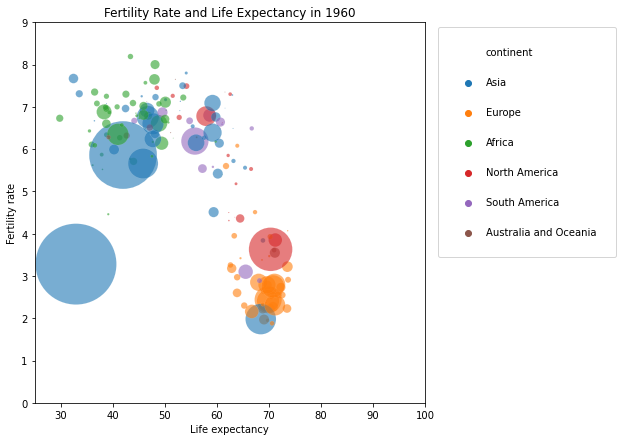

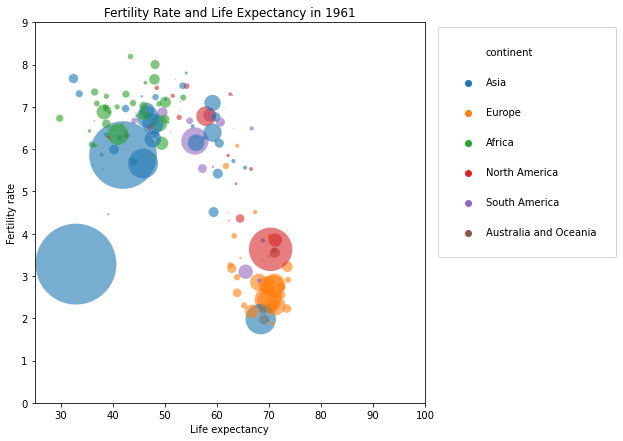

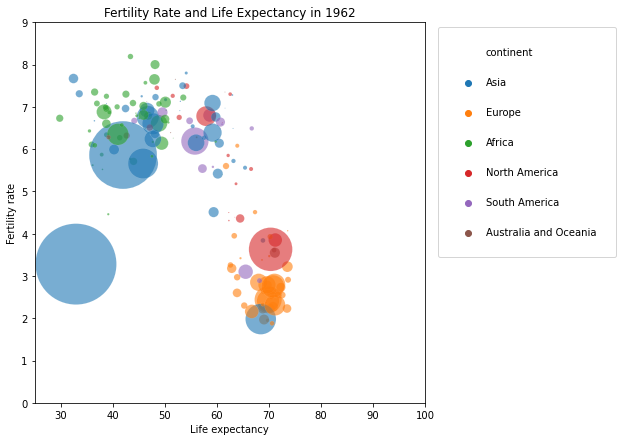

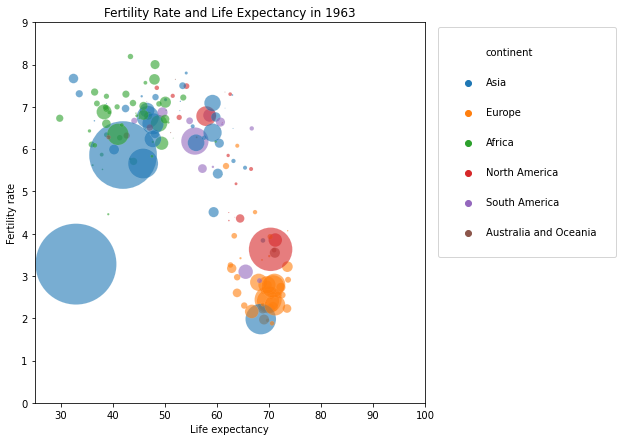

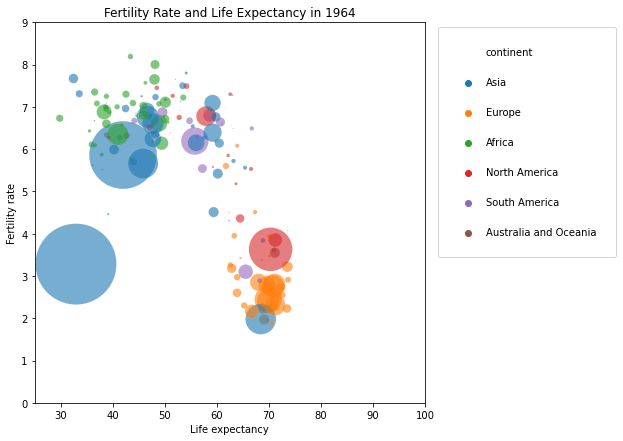

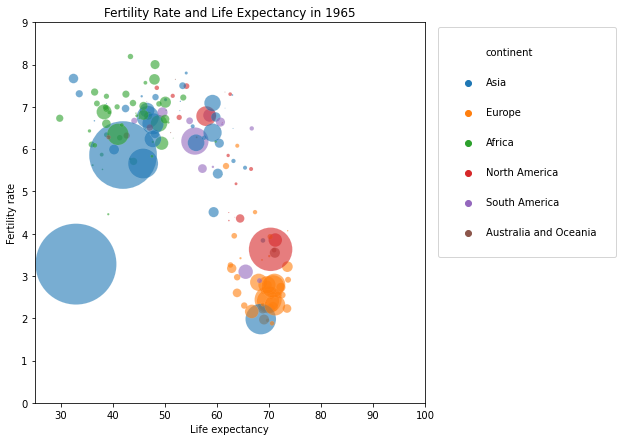

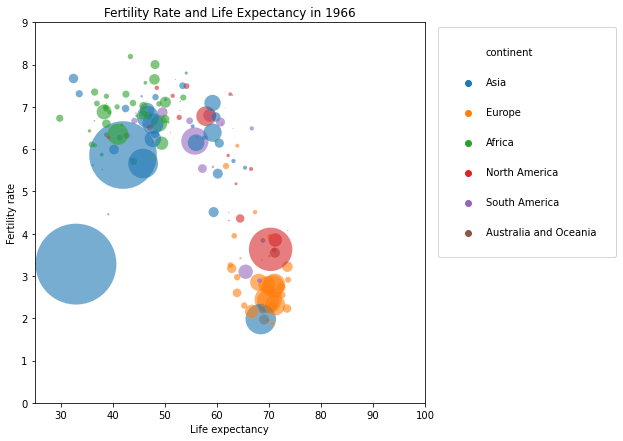

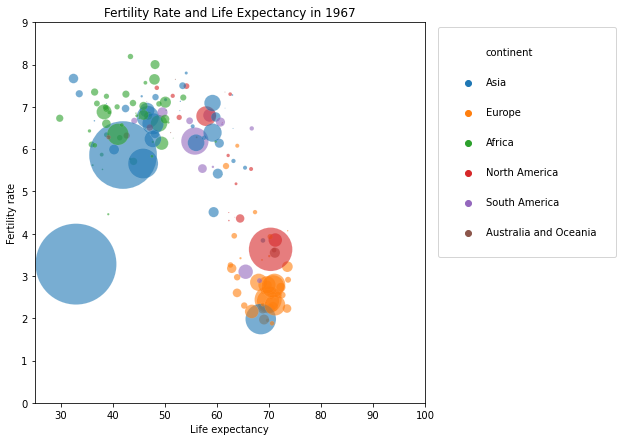

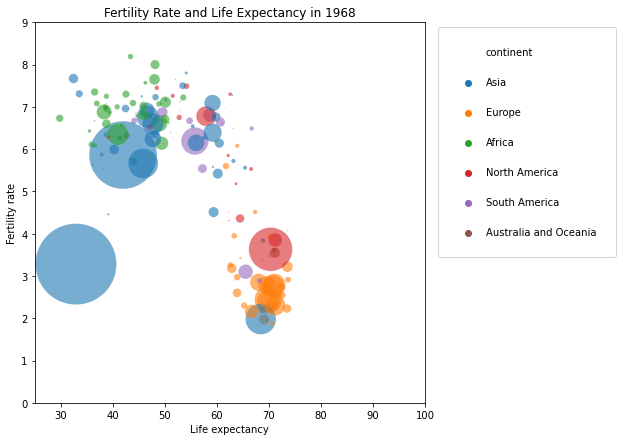

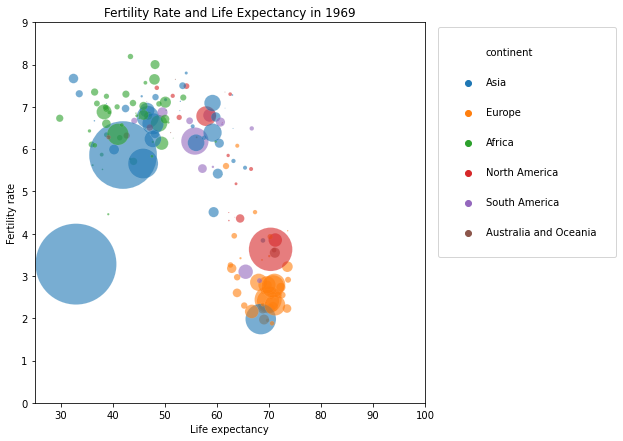

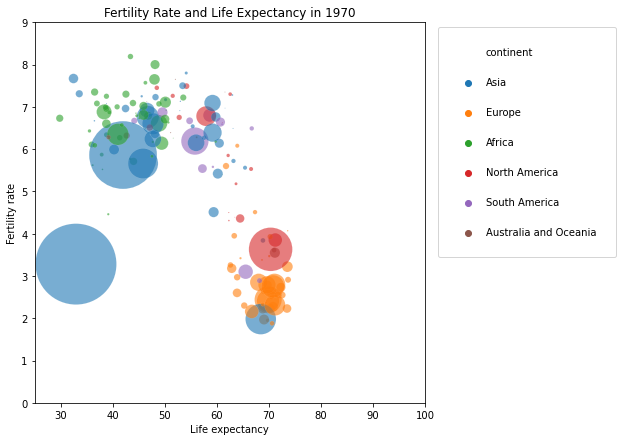

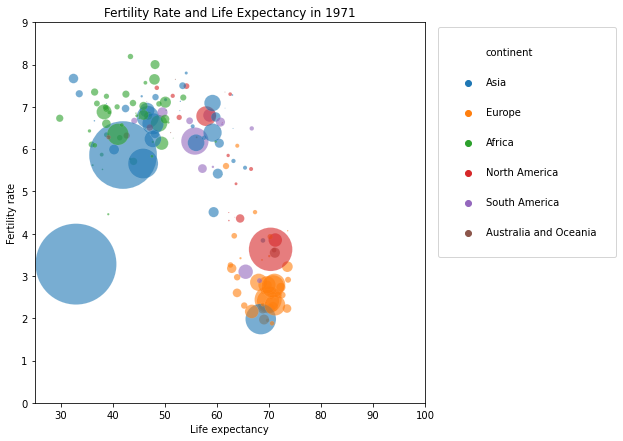

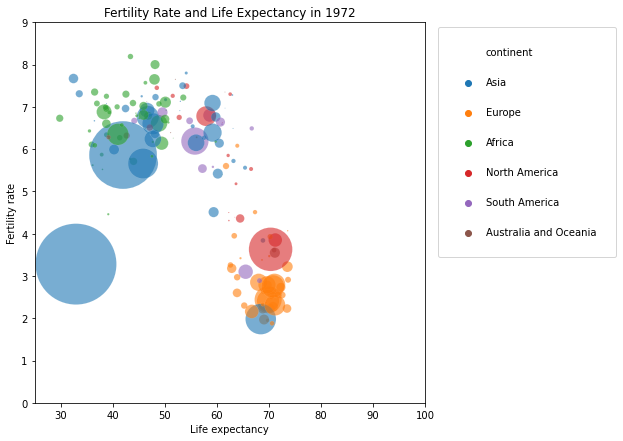

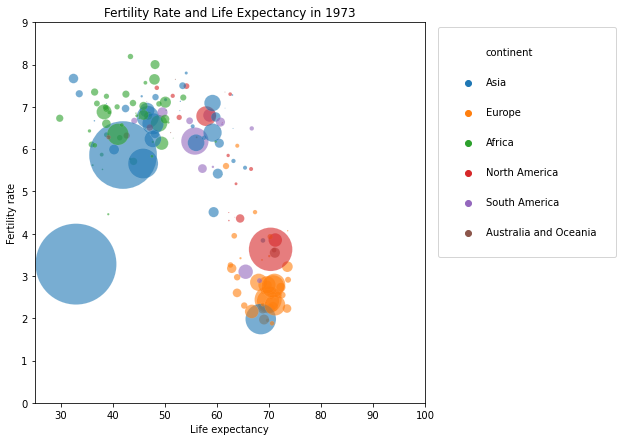

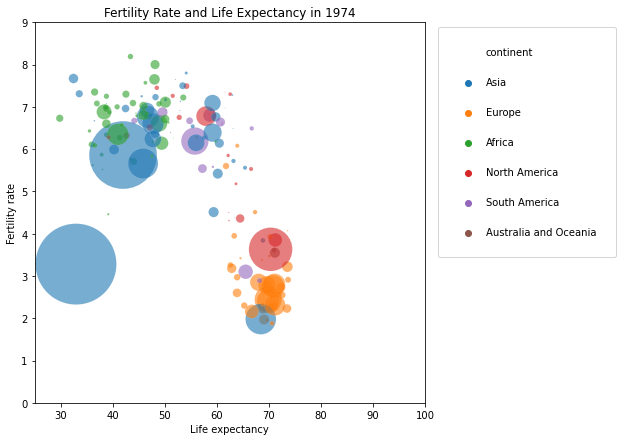

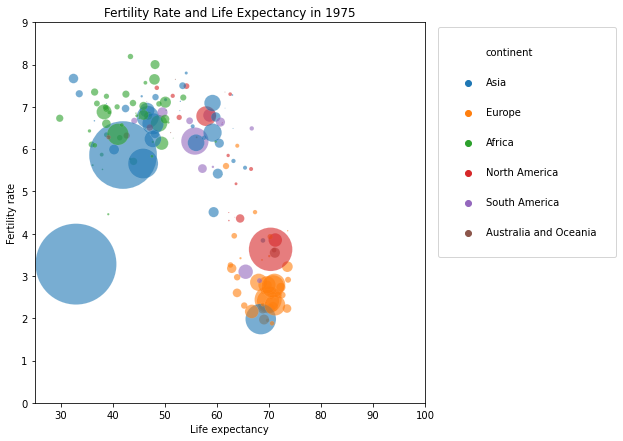

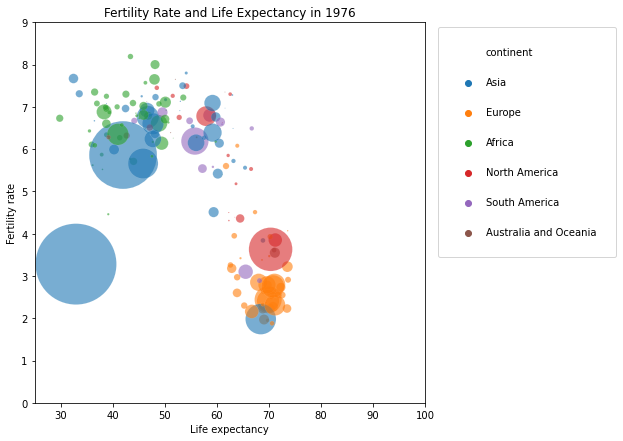

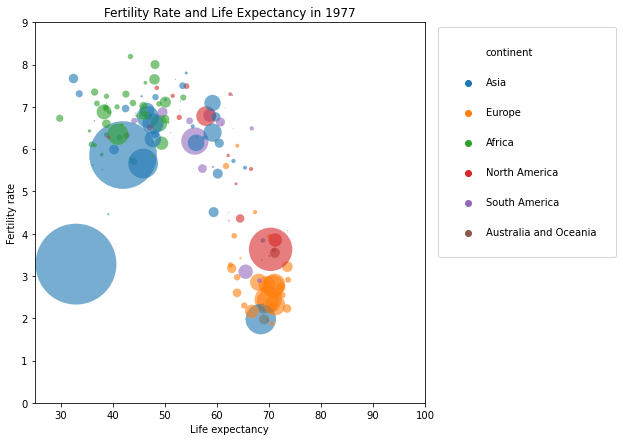

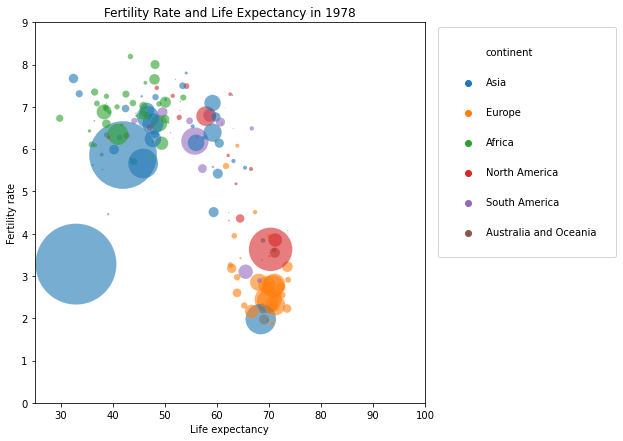

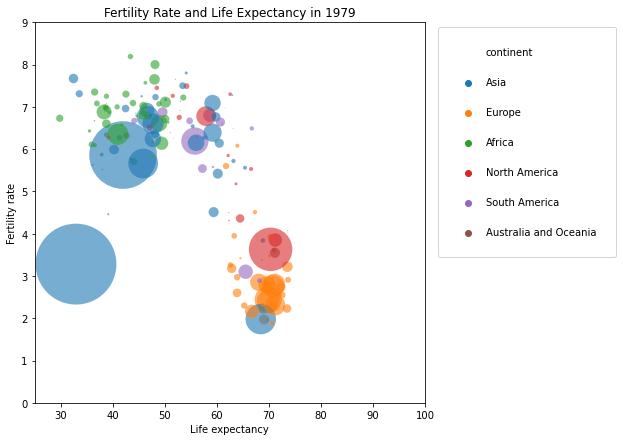

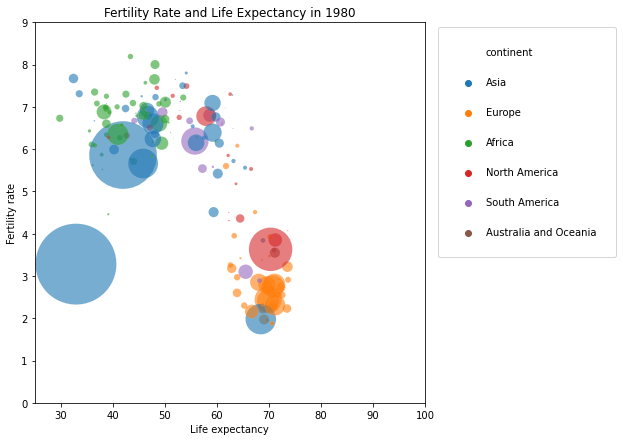

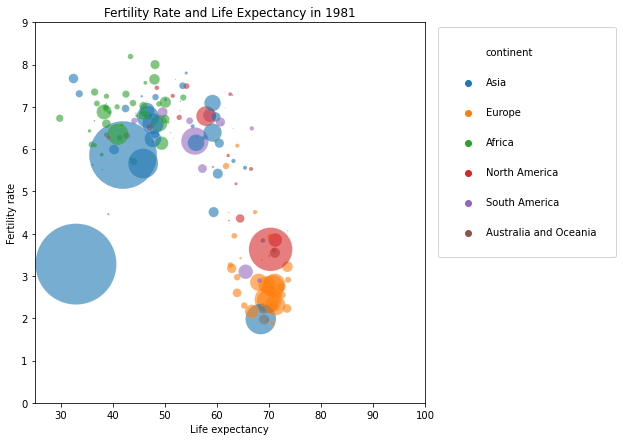

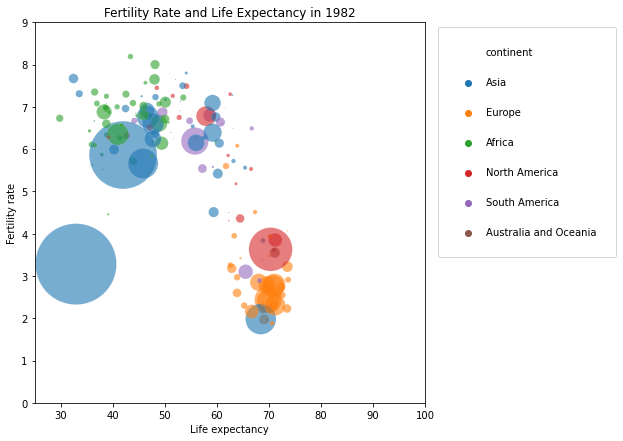

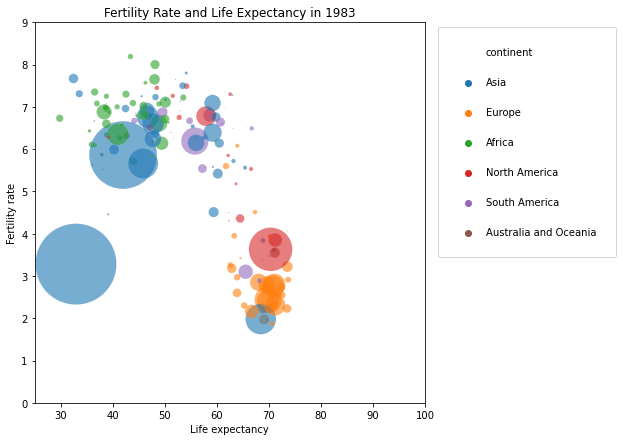

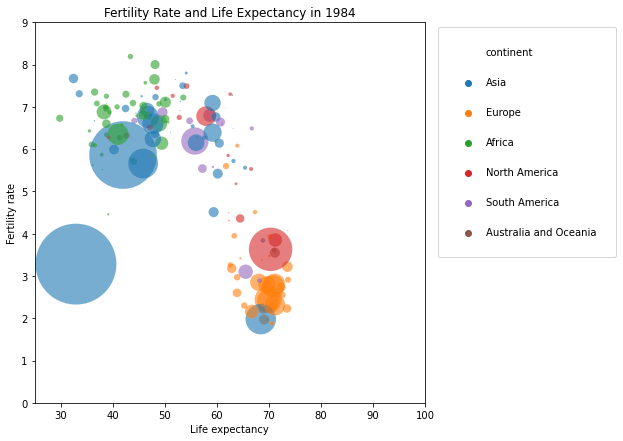

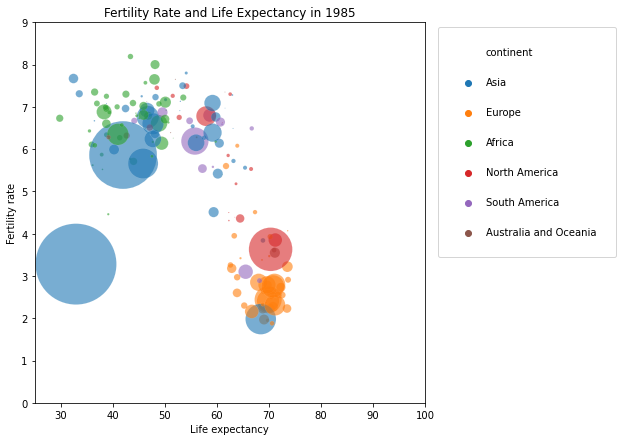

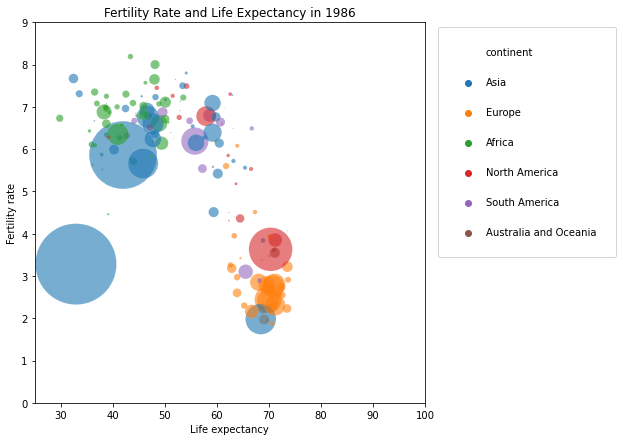

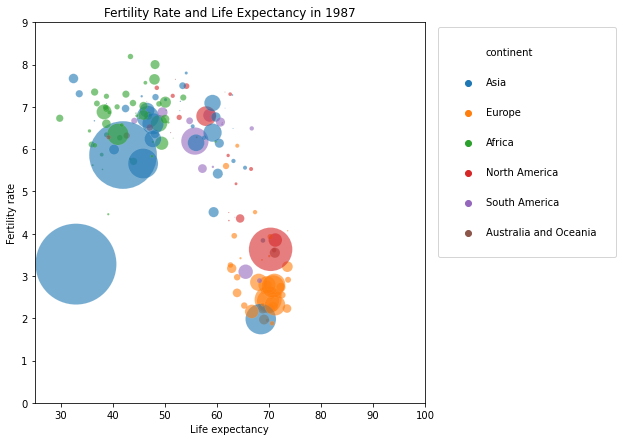

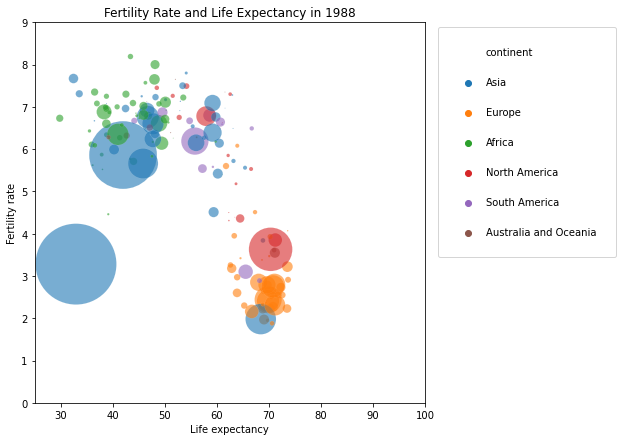

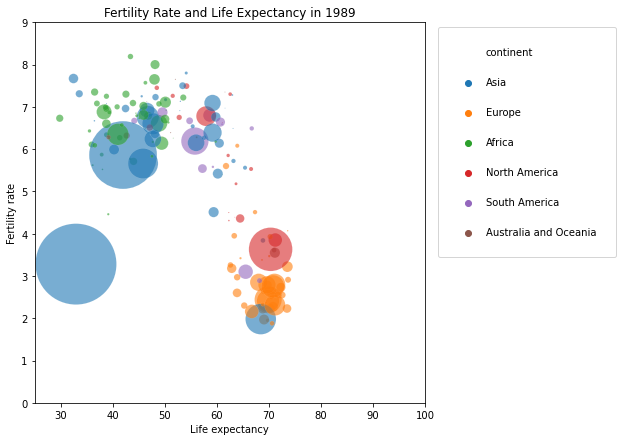

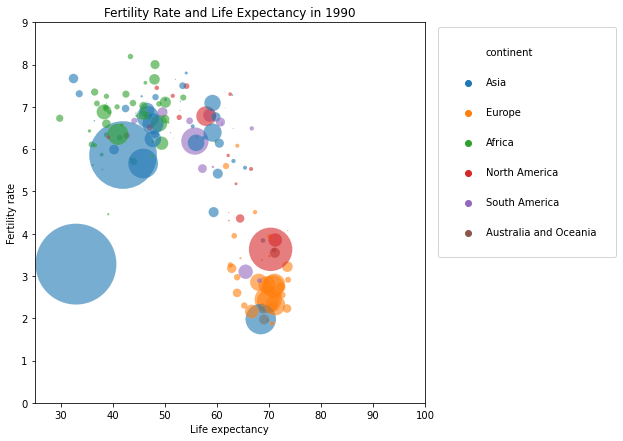

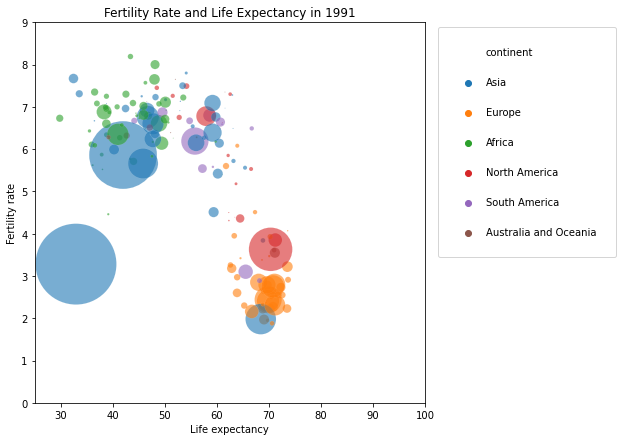

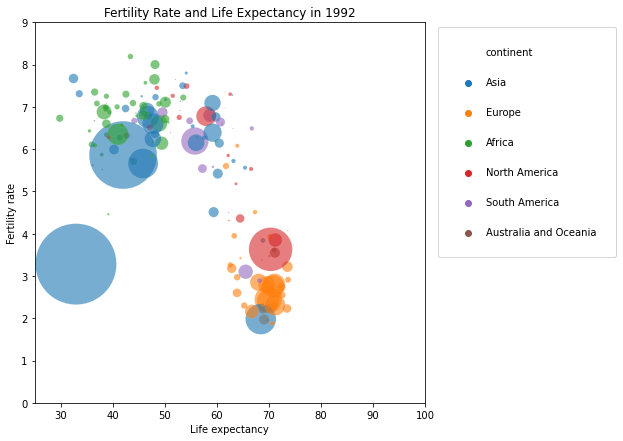

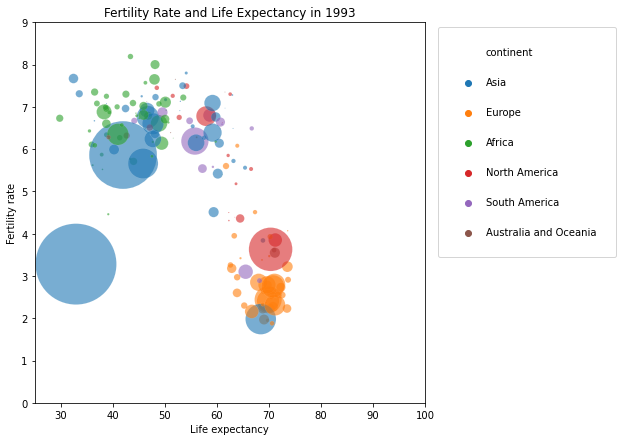

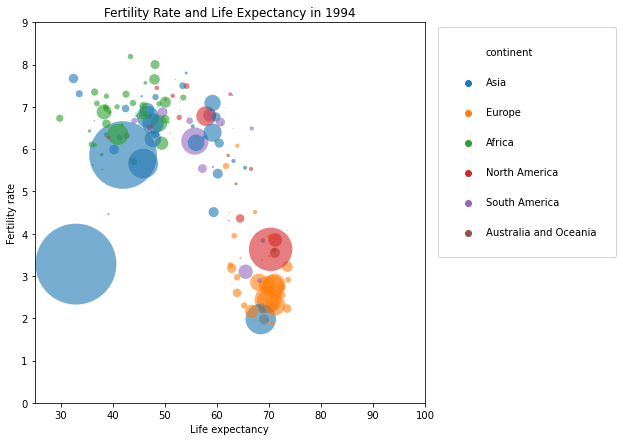

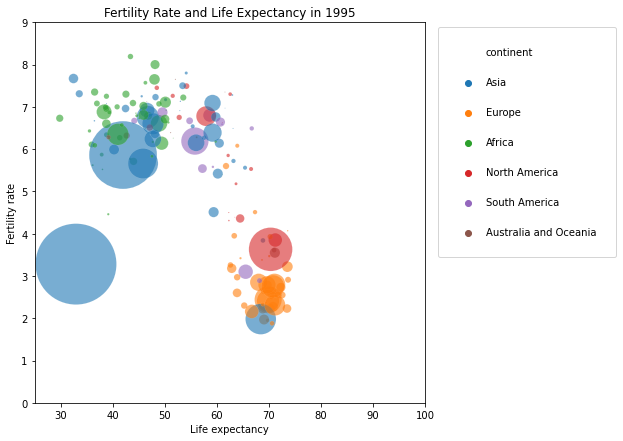

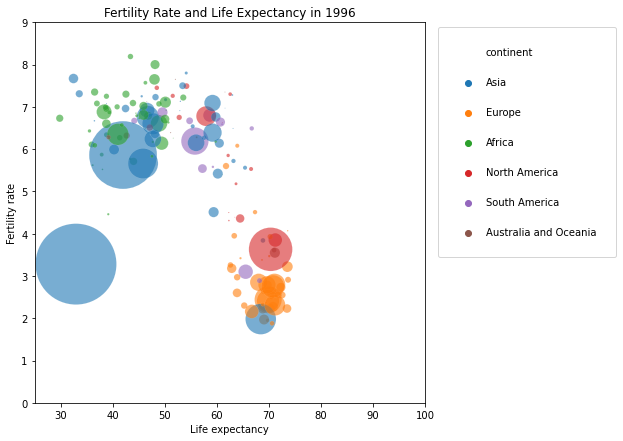

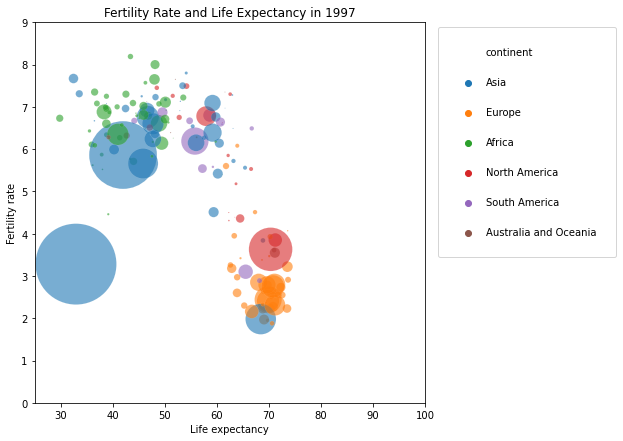

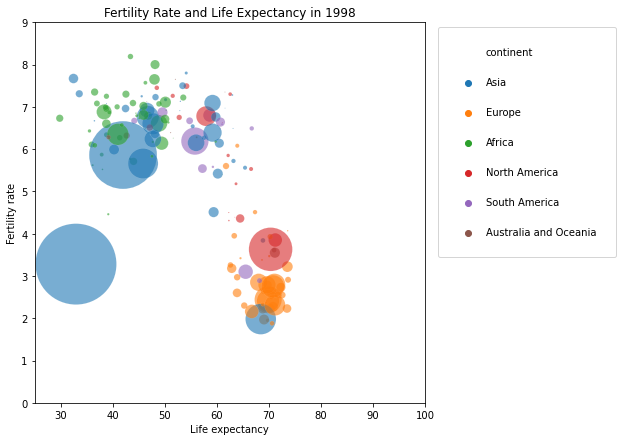

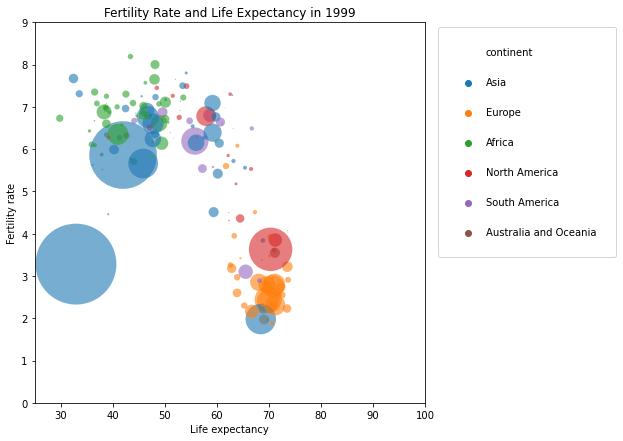

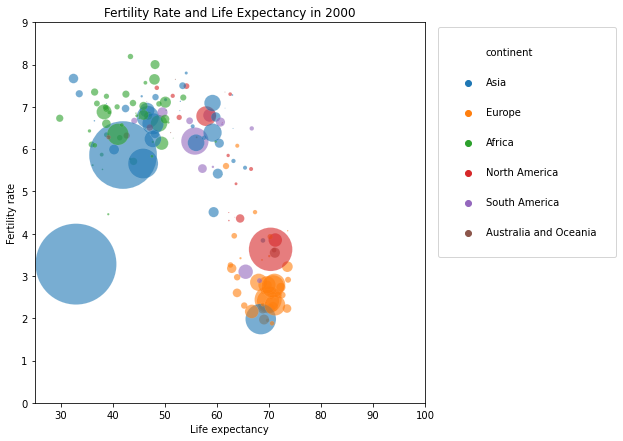

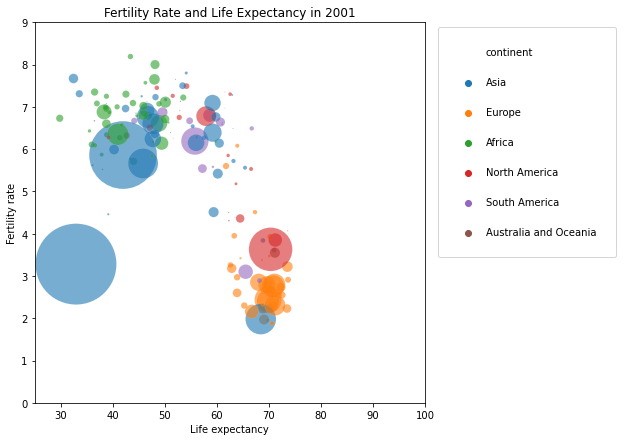

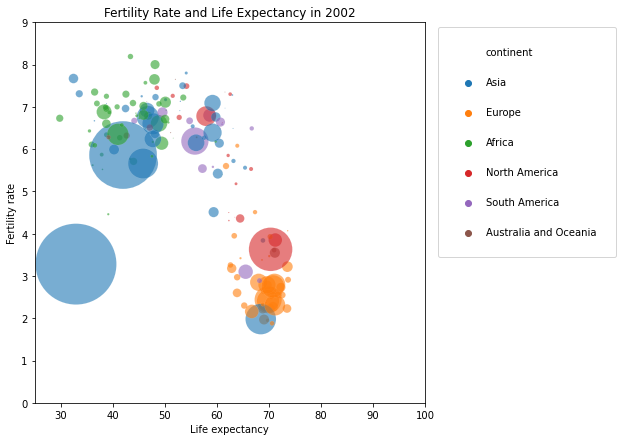

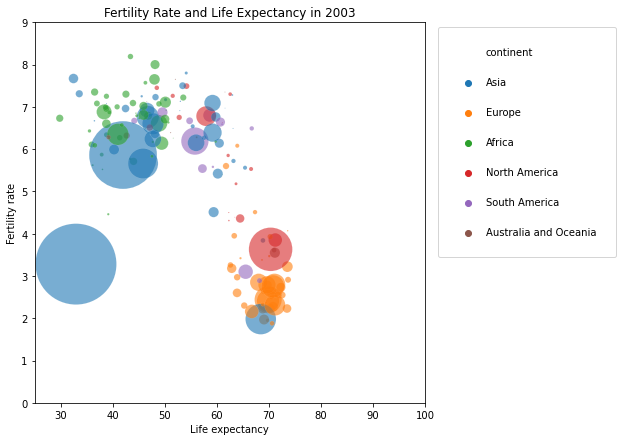

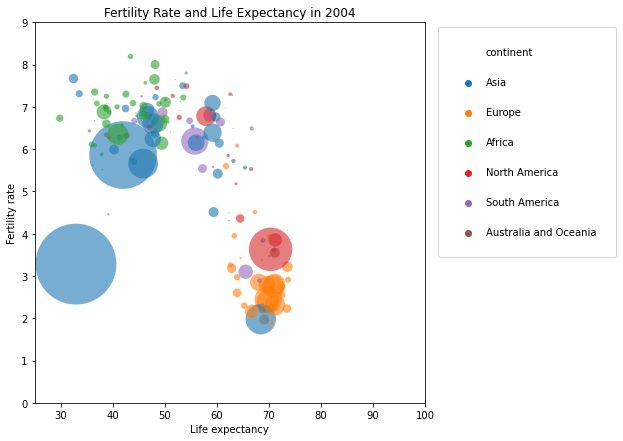

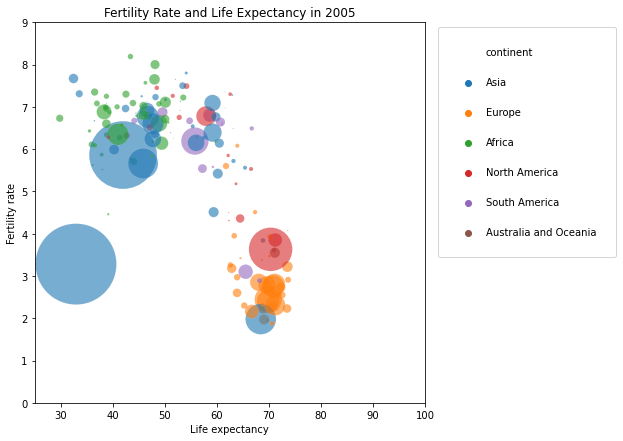

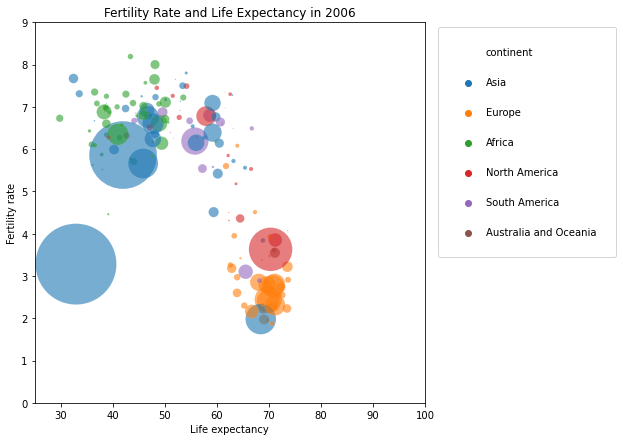

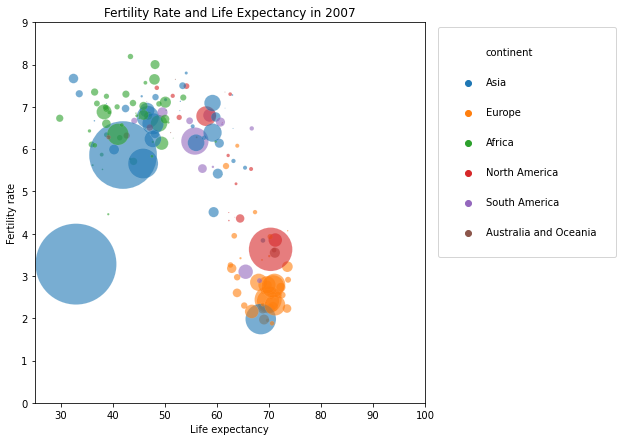

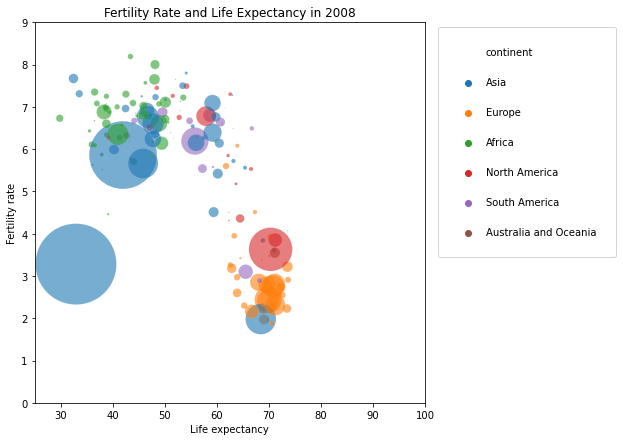

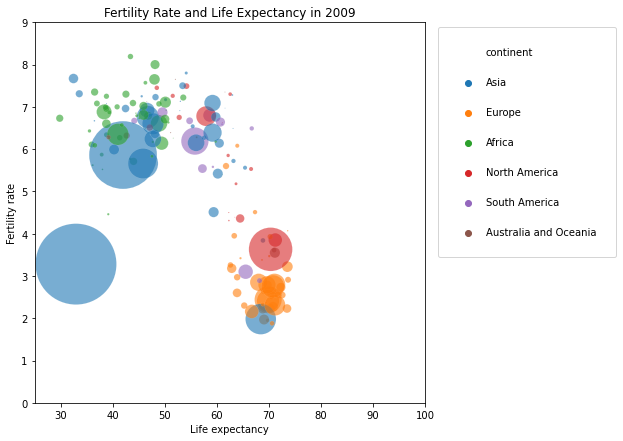

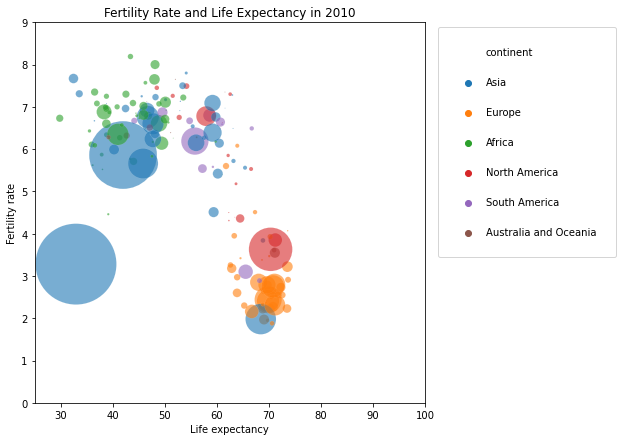

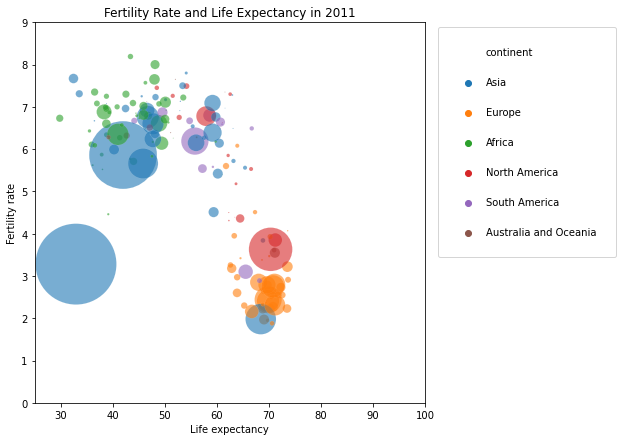

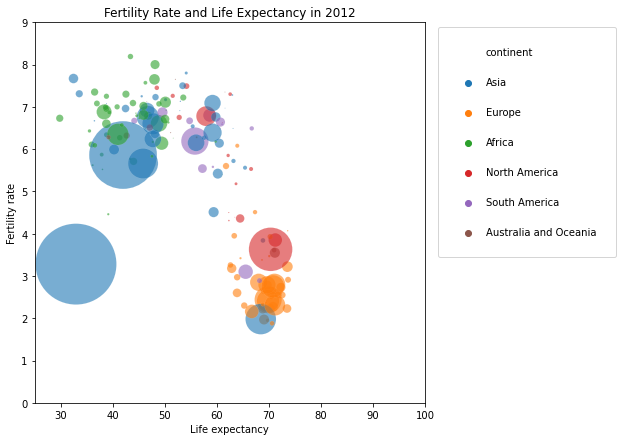

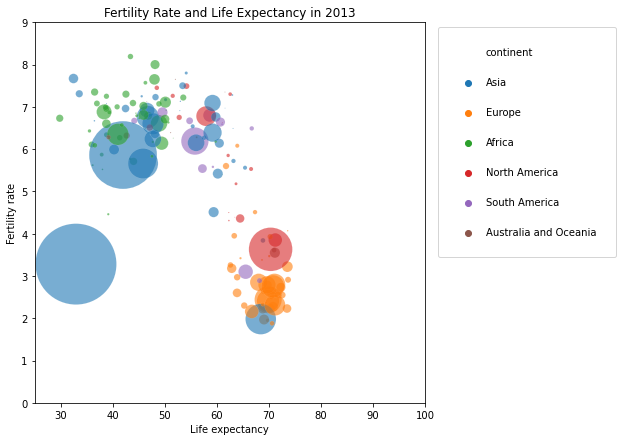

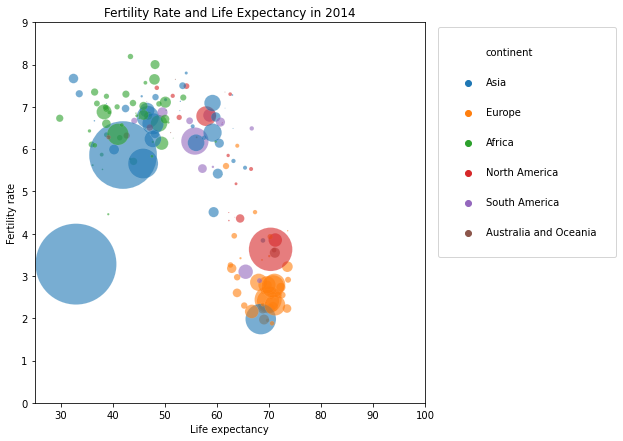

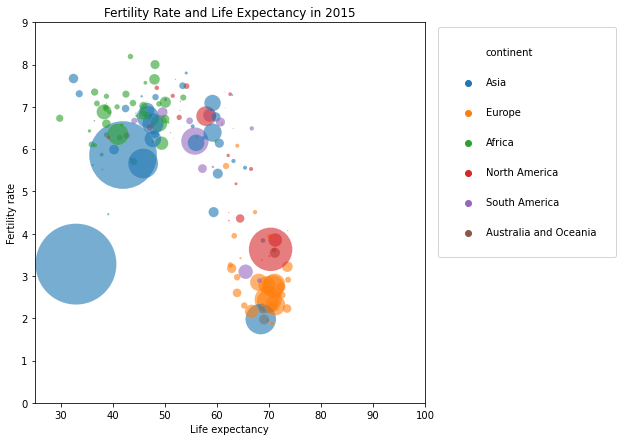

In [30]:
data_mask=df_all[df_all['year'] == year].reset_index()

for year in years_list:
    plt.figure(figsize= (7,7))
    ax1 = sns.scatterplot(x='life_expectancy', y='fertility_rate',
            data=data_mask, alpha=0.6,sizes = dict ,size='population', hue='continent')
    #print(labels)
    handles, labels = ax1.get_legend_handles_labels()
    plt.axis((25, 100, 0, 9))
    plt.legend([handles[i] for i in range(7)],[labels[i] for i in range(7)], borderpad=2, labelspacing=2, loc='best', bbox_to_anchor=(1.02, 1))
    plt.xlabel('Life expectancy')
    plt.ylabel('Fertility rate')
    plt.title('Fertility Rate and Life Expectancy in ' + str(year))
    plt.savefig(save_path + 'Fertility Rate and Life Expectancy in ' + str(year) + '.png', bbox_inches='tight')
    plt.show()
    plt.close()

The resources that helped me figure out how to hide some of the legend 
https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.get_legend_handles_labels.html
https://www.statology.org/matplotlib-legend-order/

In [31]:
images = []

for year in years_list:
    filename = save_path + 'Fertility Rate and Life Expectancy in {}.png'.format(year)
    images.append(imageio.imread(filename))

imageio.mimsave('output.gif', images, fps=15)